https://github.com/prayash-ghimire/FinalProject

Exploring the Video Game Industry: An Analysis of Sales, Ratings, and Market Trends from 1994 to 2016 by Prayash Ghimire

This project serves as an analysis of video game sales data from 1992 to 2016. Using the dataset “video-game-sales-with-ratings.csv” we can include relevant information such as game titles, release years, genres, ratings, and sales figures broken down by region. The project seeks to explore patterns and relationships between these variables. The data is visualized through various types of graphs, such as scatterplots, bar charts, line graphs, and boxplots. These visualization methods are used to answer questions such as the correlation between user count and user score, the impact of critic ratings on global sales, and the top genres per platform by year. Through these visualizations, the project aims to provide an understanding of the video game industry and its growth over time, with a focus on the impact of game ratings, user reviews, and regional differences on sales figures. 

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# Read the data into the notebook
url = 'https://raw.githubusercontent.com/prayash-ghimire/FinalProject/main/Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(url)
print(df.head())
#This code imports the CSV and reads it into the notebook using read csv.

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [105]:
# Clean and organize the data:
df.isna().sum()
df = df.rename(columns={'User_Score': 'User_Rating', 'Critic_Score': 'Critic_Rating'})
df['User_Rating'] = pd.to_numeric(df['User_Rating'], errors='coerce') * 10
df = df.dropna()
df = df.reset_index(drop=True)
#This code renamed some of the columns for consistensy, dropped NA values as well as adjusting user rating to be out of 100

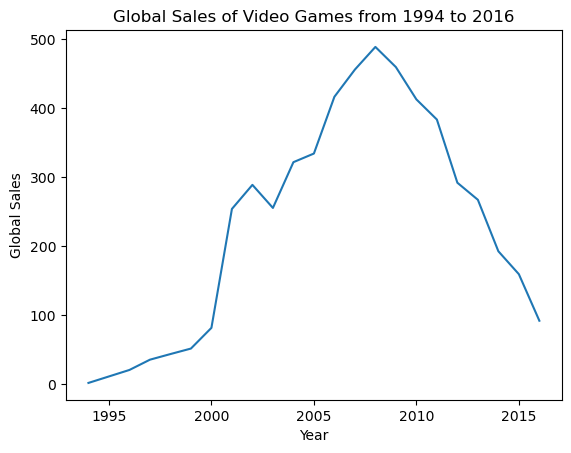

In [147]:
# How has Global Sales of Video Games changed from 1994 to 2016?

sales_by_year = df[(df['Year_of_Release'] >= 1994) & (df['Year_of_Release'] <= 2016)].groupby('Year_of_Release')['Global_Sales'].sum()
plt.plot(sales_by_year.index, sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Global Sales of Video Games from 1994 to 2016')
plt.show()

#This code first filters the dataset to include only the years between 1994 and 2016. It then groups the data by year and calculates the sum of global sales for each year. Finally, it plots the sales data over time.

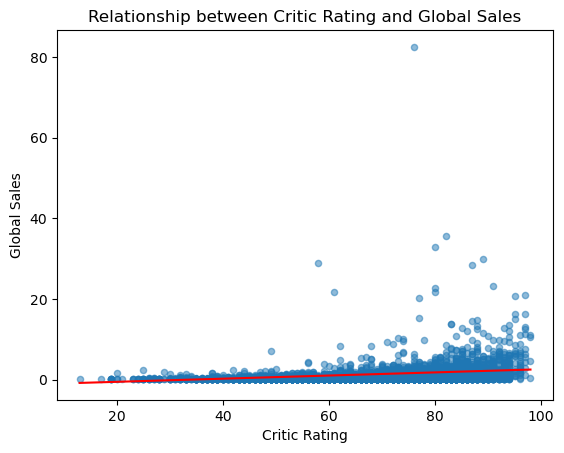

In [149]:
# How does critic score relate to global sales?

df.plot.scatter(x='Critic_Rating', y='Global_Sales', alpha=0.5)
avg_sales = df.groupby('Critic_Rating')['Global_Sales'].mean()
slope, intercept = np.polyfit(avg_sales.index, avg_sales, 1)
plt.plot(avg_sales.index, slope * avg_sales.index + intercept, color='r')
plt.xlabel('Critic Rating')
plt.ylabel('Global Sales')
plt.title('Relationship between Critic Rating and Global Sales')
plt.show()

#This code creates a scatterplot with a regression line showing the relationship between the average global sales and the critic rating for games.

In [108]:
# What are the top genres per platform, by year?

df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().sort_values(ascending=False)

#This code groups the data by platform and genre, and calculates the total global sales for each combination. The table is sorted in descending order based on the global sales column.

Platform  Genre     
PS3       Action        262.38
X360      Shooter       260.35
PS2       Action        238.73
Wii       Sports        213.53
X360      Action        209.90
                         ...  
XB        Puzzle          0.10
WiiU      Adventure       0.08
DC        Shooter         0.05
PS4       Puzzle          0.03
XOne      Simulation      0.01
Name: Global_Sales, Length: 197, dtype: float64

In [131]:
# How does the mean of game ratings differ by ESRB rating?

df.groupby('Rating')[['Critic_Rating', 'User_Rating']].mean()

#This code groups the data by the ESRB rating of games and calculates the mean critic and user ratings for each rating category. The resulting table shows the mean ratings for each ESRB rating.

,Critic_Rating,User_Rating
Rating,,
AO,93.000000,86.000000
E,70.679155,71.616234
E10+,68.226882,69.031183
K-A,92.000000,74.000000
M,71.964410,71.766225
RP,63.000000,68.000000
T,69.679849,73.220867


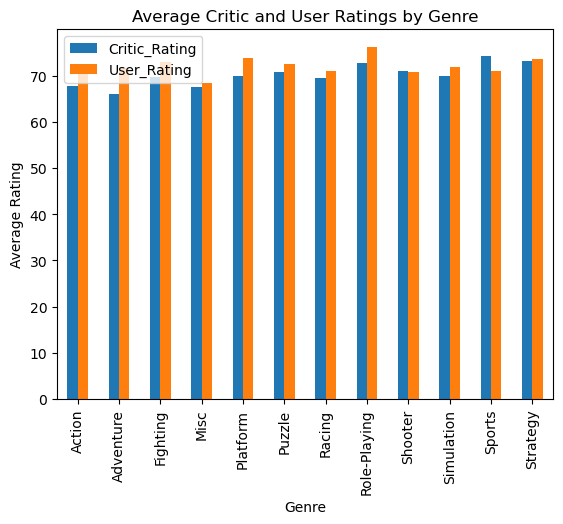

In [111]:
# How do user scores compare to critic scores for games by genre?

df.groupby('Genre')[['Critic_Rating', 'User_Rating']].mean().plot.bar()
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Critic and User Ratings by Genre')
plt.show()

#This code calculates and displays the average critic and user ratings for games by genre as a bar graph. It helps to compare how user scores differ from critic scores for different genres of games.

In [130]:
# Analysis of Game Count and Ratings by the top 10 Developers

developer_count = df.groupby('Developer')['Name'].count().reset_index(name='Game_Count')
developer_ratings = df.groupby('Developer')[['Critic_Rating', 'User_Rating']].mean()
developer_stats = pd.merge(developer_count, developer_ratings, on='Developer')
developer_stats = developer_stats.sort_values('Game_Count', ascending=False)
print(developer_stats.head(10).to_string(index=False))

#This code calculates the number of games and the average critic and user ratings by developer. The top 10 developers with the highest game count are extracted and displayed in a table with their game count, critic rating, and user rating.

       Developer  Game_Count  Critic_Rating  User_Rating
       EA Canada         149      76.228188    73.214765
       EA Sports         142      80.366197    70.471831
          Capcom         126      74.984127    77.460317
         Ubisoft         103      67.038835    68.553398
          Konami          95      72.442105    72.189474
Ubisoft Montreal          87      75.436782    71.896552
      EA Tiburon          82      76.378049    68.646341
     Omega Force          69      64.057971    77.811594
        Nintendo          68      80.470588    80.191176
 Visual Concepts          68      82.294118    71.161765


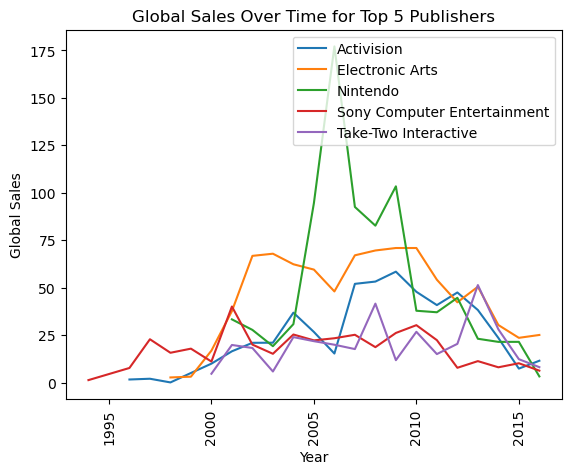

In [140]:
# Who are the top publishers by global sales, and how has their market share changed over time since 1994?

top_publishers = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index.to_list()
filtered_data = df[df['Year_of_Release'] >= 1994]
publisher_data = filtered_data.groupby(['Publisher', 'Year_of_Release'])['Global_Sales'].sum().reset_index()
filtered_publisher_data = publisher_data[publisher_data['Publisher'].isin(top_publishers)]
pivot_data = filtered_publisher_data.pivot(index='Year_of_Release', columns='Publisher', values='Global_Sales')
pivot_data.plot.line()
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Global Sales Over Time for Top 5 Publishers')
plt.show()

#This code identifies the top publishers by global sales and tracks how their market share has changed over time since 1994. It does this by grouping the data by publisher and year, selecting the top 5 publishers by global sales, pivoting the data, and plotting it as a line graph.

In [114]:
# What was the top game in each region in 2012?

sales_2012 = df[df['Year_of_Release'] == 2012]
sales_2012 = sales_2012.dropna(subset=['NA_Sales', 'EU_Sales', 'JP_Sales'])
top_na_game = sales_2012.loc[sales_2012['NA_Sales'].idxmax(), 'Name']
top_eu_game = sales_2012.loc[sales_2012['EU_Sales'].idxmax(), 'Name']
top_jp_game = sales_2012.loc[sales_2012['JP_Sales'].idxmax(), 'Name']
results_table = pd.DataFrame({
    'Region': ['North America', 'EU', 'Japan'],
    'Top Game in 2012': [top_na_game, top_eu_game, top_jp_game]
})
print(results_table)

#This code identifies the top game in each region (North America, EU, and Japan) in the year 2012, using the sales data from that year. The code filters the original dataset to include only sales data from 2012, and drops rows with missing sales data. The top-selling games in each region are determined using the idxmax() function, and the results are printed in a table using a Pandas.

          Region            Top Game in 2012
0  North America  Call of Duty: Black Ops II
1             EU  Call of Duty: Black Ops II
2          Japan   Animal Crossing: New Leaf


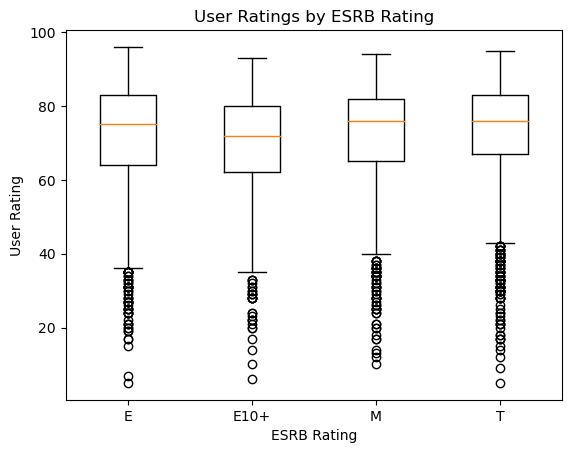

In [137]:
# Is there a correlation between user count and user score, excluding rarely used ratings?

filtered_df = df[df['User_Count'] != 0]
filtered_df = filtered_df[~filtered_df['Rating'].isin(['AO', 'K-A', 'RP'])]
grouped_df = filtered_df.groupby('Rating')['User_Rating'].apply(list).reset_index(name='User_Ratings')
plt.boxplot(grouped_df['User_Ratings'], labels=grouped_df['Rating'])
plt.xlabel('ESRB Rating')
plt.ylabel('User Rating')
plt.title('User Ratings by ESRB Rating')
plt.show()

#This code creates a boxplot showing the distribution of user ratings for each ESRB rating category. It excludes rarely used ratings and only includes games with non-zero user counts.

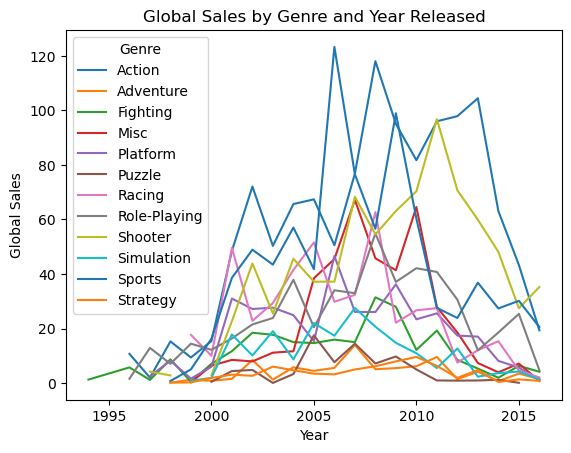

In [144]:
# Is there an interactive relationship between year released, genre, and sales?

df[(df['Year_of_Release'] >= 1994) & (df['Year_of_Release'] <= 2016)].groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().unstack().plot()
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Global Sales by Genre and Year Released')
plt.show()

#This code analyzes the relationship between year of release, genre, and sales. It groups the data by year and genre, and calculates the sum of global sales for each group. It then creates a line graph of global sales over time for each genre, showing how sales in each genre have changed over time.

Text(0.5, 1.0, 'Sales of Pokemon Games Over the Years')

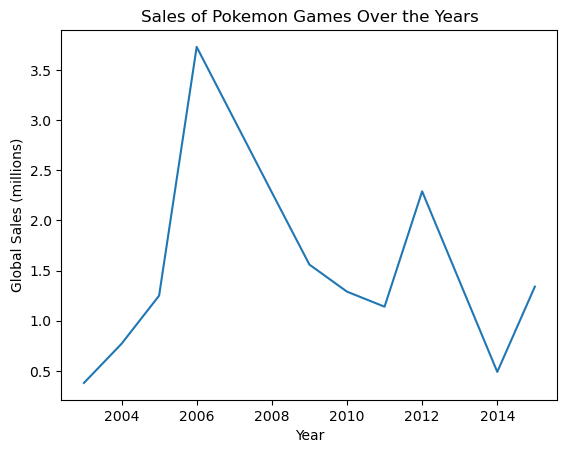

In [145]:
# How have the sales of Pokemon games changed over the years?

pokemon_df = df[df['Name'].str.contains('Pokemon')]
pokemon_sales_by_year = pokemon_df.groupby('Year_of_Release')['Global_Sales'].sum()
pokemon_sales_by_year.plot()
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.title('Sales of Pokemon Games Over the Years')

# This code creates a subset of the data to filter the Pokemon games, then groups the data by year and sales, and ultimately creates a line graph to display the data.

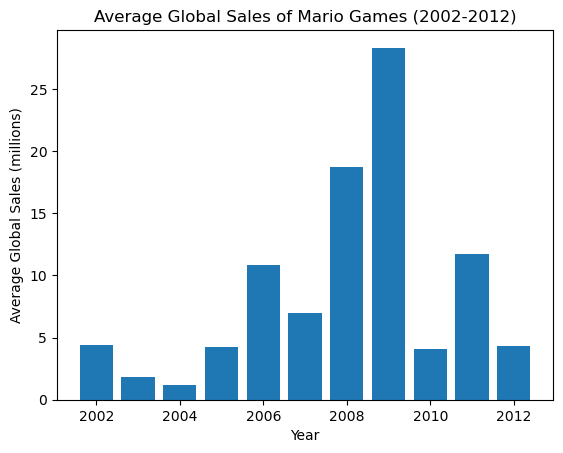

In [146]:
# How have Mario games sales changed in the decade between 2002 and 2012?

mario_df = df[(df['Name'].str.contains('Mario')) & (df['Year_of_Release'] >= 2002) & (df['Year_of_Release'] <= 2012)]
avg_sales_by_year = mario_df.groupby('Year_of_Release')['Global_Sales'].mean()
plt.bar(avg_sales_by_year.index, avg_sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Global Sales (millions)')
plt.title('Average Global Sales of Mario Games (2002-2012)')
plt.show()

# This code creates a subset of the data to filter the Mario games, then groups the data by year from 2002 - 2012 and sales, and ultimately creates a bar graph to display the data.